In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout

In [2]:
mnist = tf.keras.datasets.mnist

#unpacking the dataset into train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

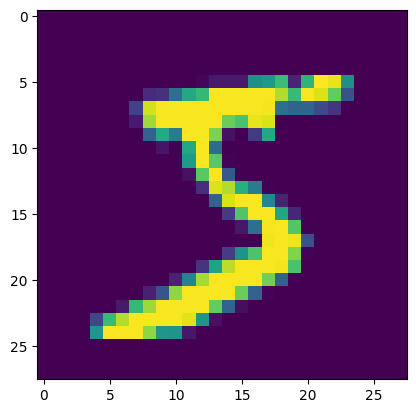

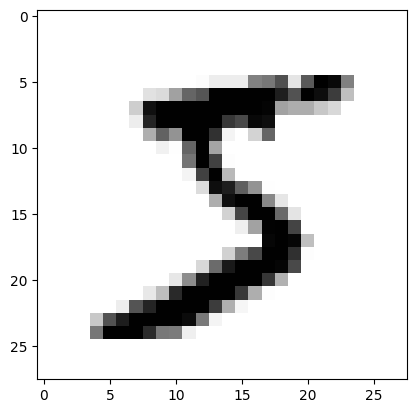

In [4]:
#checking the first image of the dataset
plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0], cmap = plt.cm.binary)

In [5]:
#checking the values of each pixel
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

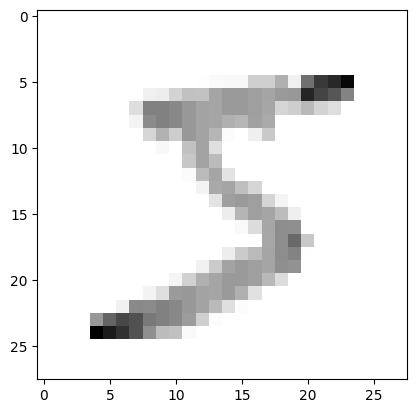

In [6]:
#preprocessing data
#scaling down the data

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#axis 0 = column, axis 1 = row
plt.imshow(x_train[0], cmap = plt.cm.binary) 

In [7]:
print(y_train[0])

5


In [8]:
x_trainr = np.array(x_train).reshape(-1, 28, 28, 1)
x_testr = np.array(x_test).reshape(-1, 28, 28, 1)

print("Training samples dimension: ", x_trainr.shape)
print("Testing samples dimension: ", x_testr.shape)

Training samples dimension:  (60000, 28, 28, 1)
Testing samples dimension:  (10000, 28, 28, 1)


In [9]:
#creating a deep neural network

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd conv layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd conv layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#fc layer
model.add(Flatten()) #flattening should be done before fc layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#fc layer 2
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#last fc layer
model.add(Dense(10))
model.add(Activation('softmax'))

C:\Users\vinot\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x_trainr, y_train, epochs=10)
#training the model

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.6424 - loss: 1.0363
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9387 - loss: 0.2312
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9575 - loss: 0.1667
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9636 - loss: 0.1396
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9662 - loss: 0.1331
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9697 - loss: 0.1169
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9722 - loss: 0.1109
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9732 - loss: 0.1022
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9765 - loss: 0.0900
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9776 - loss: 0.0841


In [12]:
model.save(r'C:\Users\vinot\Downloads\model\model.h5')

In [13]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 samples", test_loss)
print("Test accuracy on 10,000 samples", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9832 - loss: 0.0620
Test loss on 10,000 samples 0.04903493821620941
Test accuracy on 10,000 samples 0.9868000149726868


In [14]:
prediction = model.predict([x_testr])

print(prediction)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[1.8188366e-16 6.8186935e-11 1.1446614e-07 ... 9.9999964e-01
  3.4327363e-12 2.3925770e-08]
 [1.2804620e-08 2.0687260e-07 9.9985337e-01 ... 7.6096236e-05
  2.5999152e-06 3.0577041e-08]
 [9.9821551e-10 9.9999797e-01 1.6421989e-08 ... 1.8974561e-06
  6.0477142e-08 1.1522890e-11]
 ...
 [6.4096183e-14 3.5310071e-11 4.6049964e-10 ... 9.3207841e-10
  1.1192058e-07 2.7549228e-07]
 [5.8146026e-09 9.4456535e-12 8.3804644e-11 ... 4.4306191e-12
  1.8540145e-06 4.4723228e-07]
 [6.8606226e-07 6.7558129e-12 1.5245041e-10 ... 1.5383990e-14
  1.4839408e-06 9.7862018e-10]]


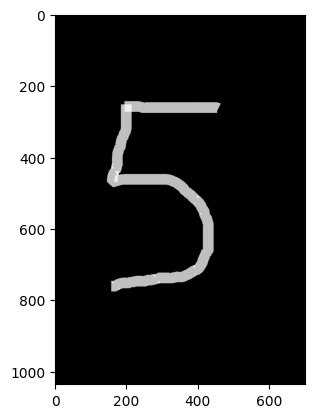

In [20]:
img = cv2.imread(r'C:\Users\vinot\Downloads\digits\digit5.png')
plt.imshow(img)

In [23]:
img.shape

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

newimg = tf.keras.utils.normalize (resized, axis = 1)

newimg = np.array(newimg).reshape(-1, 28, 28, 1)

pred = model.predict(newimg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [24]:
print(f"This digit is probably {np.argmax(pred)}")

This digit is probably 5
